In [1]:
#importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv file
df = pd.read_csv(r"C:\Users\sharv\OneDrive\Desktop\retail_sales_dataset.csv")

In [43]:
df.shape
print("Dimension:",df.shape)

Dimension: (1000, 9)


In [32]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [36]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
#data cleaning
pd.isnull(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [42]:
#checking for null values
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [50]:
#decriptive statistics
print("Basic Statistics:")
df.describe()

Basic Statistics:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [60]:
df[['Age','Quantity','Price per Unit','Total Amount']].describe()


,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [23]:
#Time series Analysis
#adding month column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

In [5]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

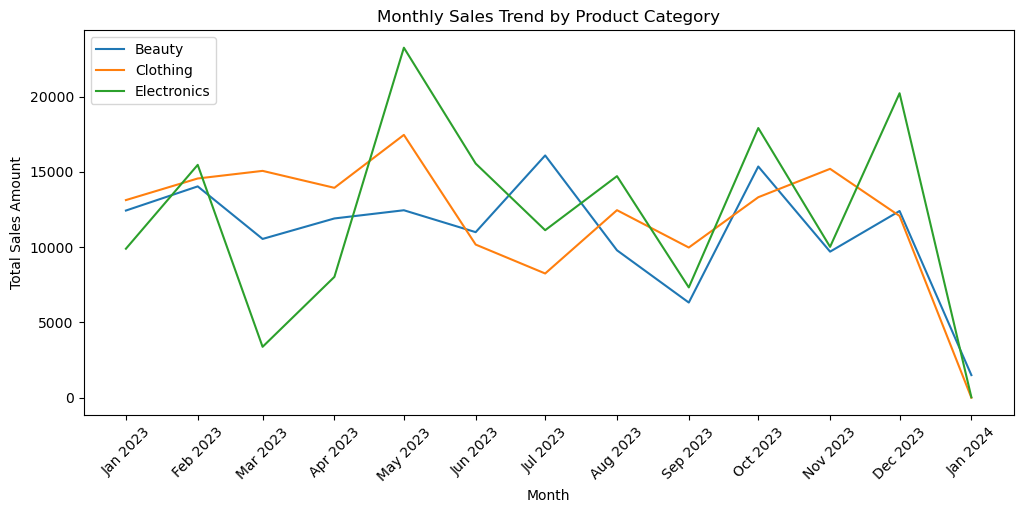

In [84]:
#monthly sales trend wrt product category
product_monthlysales = df.groupby([df['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

pivottable = product_monthlysales.pivot(index='Date', columns='Product Category', values='Total Amount')

plt.figure(figsize=(12, 5))
for category in pivottable.columns:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], label=category)

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)   
plt.show()

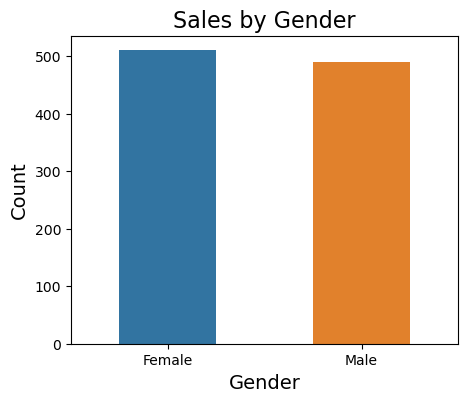

In [17]:
#sales by gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values,width=0.5)

plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sales by Gender', fontsize=16)

plt.show()

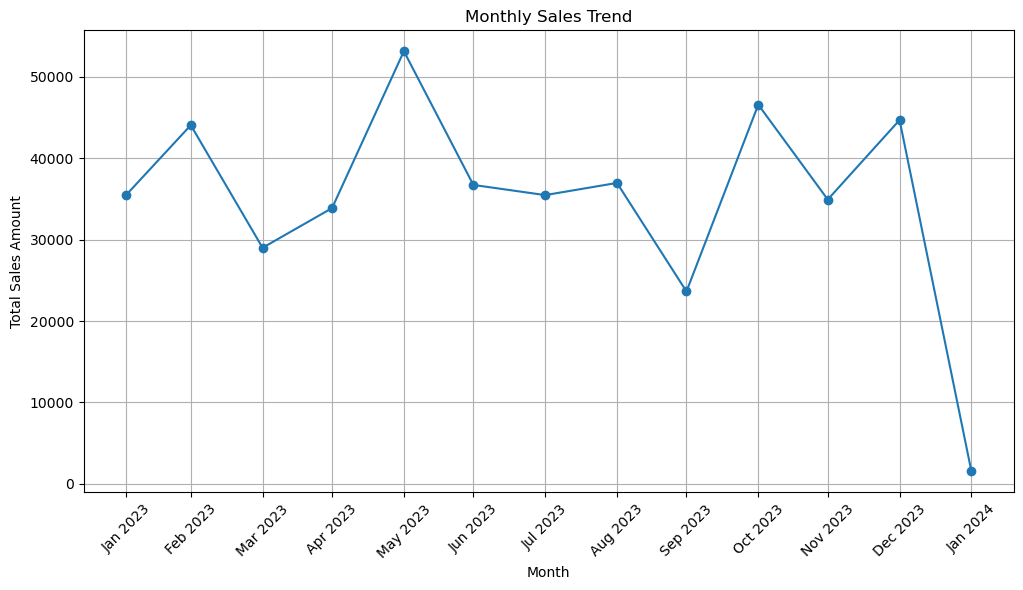

In [12]:
#Monthly Sales Trend
df['Date']=pd.to_datetime(df['Date'])
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

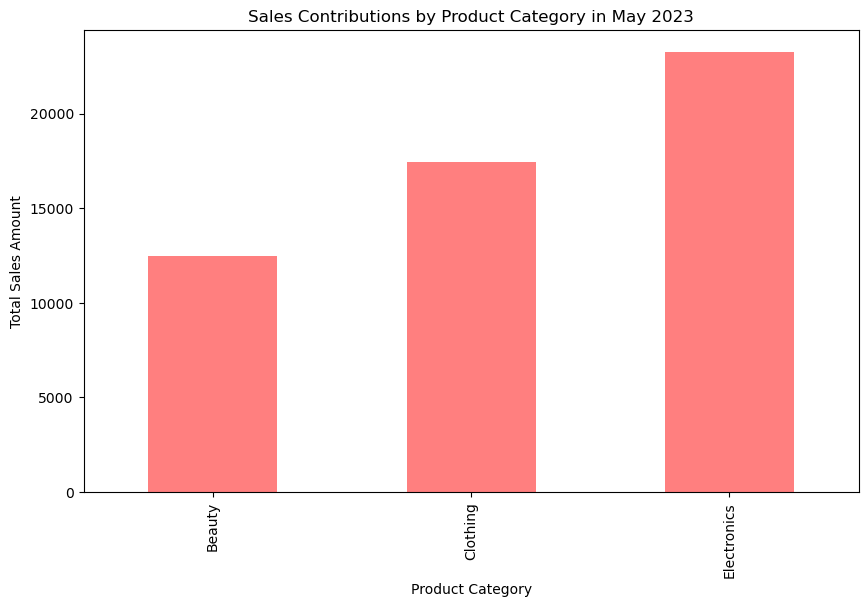

The total sales in the month of May is: 53150


In [15]:
#sales by product
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='red',alpha=0.5)
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()
total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')

<Axes: >

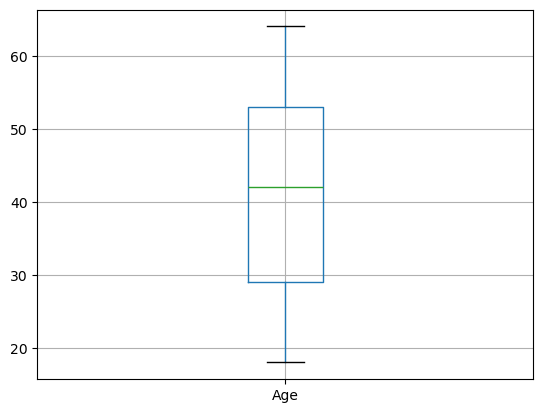

In [19]:
df.boxplot(column='Age',showfliers=True)

In [21]:
unique = df['Product Category'].unique()
for category in unique:
  print(category)

Beauty
Clothing
Electronics


Text(0.5, 1.0, 'Age distribution by product category')

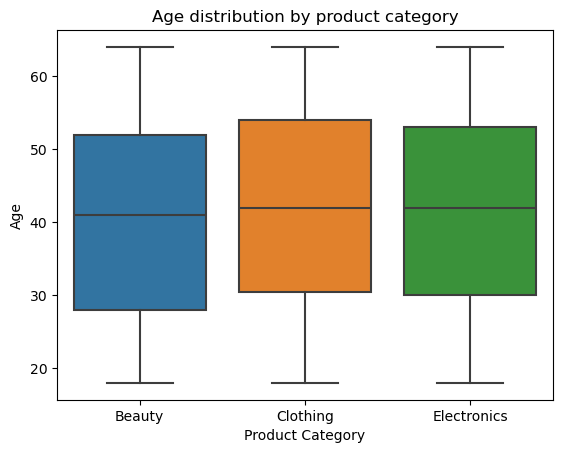

In [24]:
sns.boxplot(x=df['Product Category'],y=df['Age'],data=df).set_title('Age distribution by product category')

Text(0.5, 1.0, 'Age distribution by Gender')

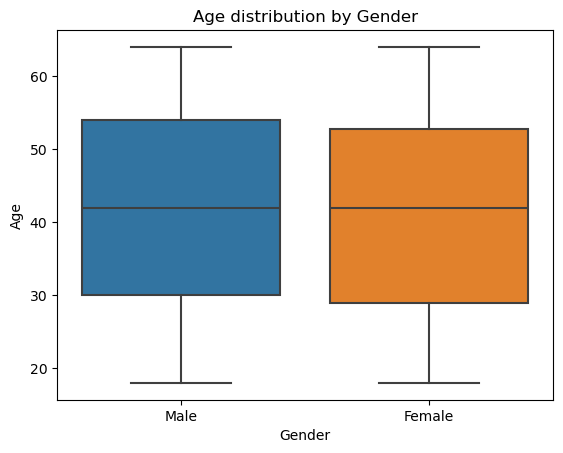

In [25]:
sns.boxplot(x=df['Gender'],y=df['Age'],data=df).set_title('Age distribution by Gender')

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

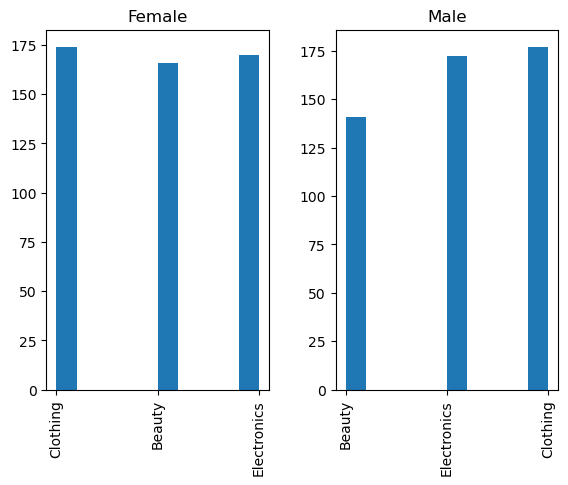

In [27]:
df.hist(column='Product Category',by='Gender')

<Axes: xlabel='Gender'>

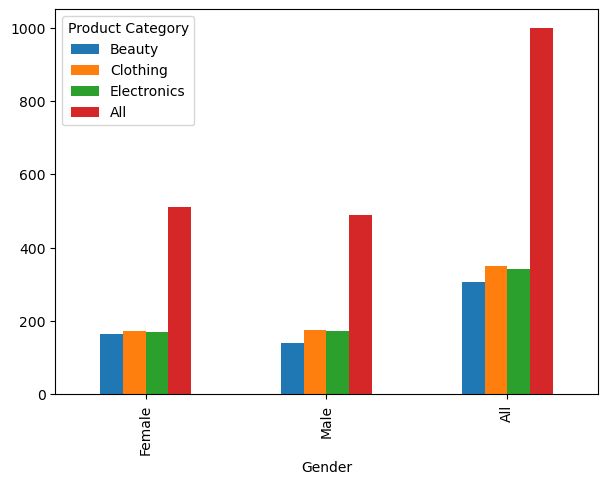

In [28]:
pd.crosstab(df['Gender'],df['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

Gender
Female    510
Male      490
Name: count, dtype: int64


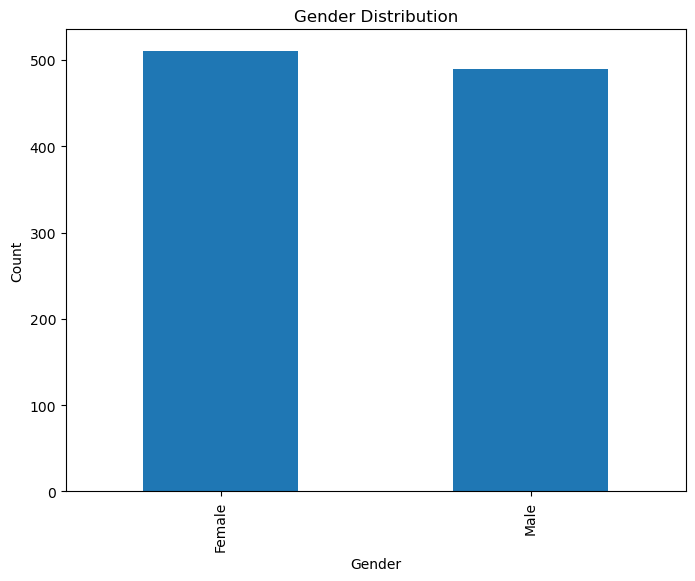

In [29]:
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

gender_distribution.plot(kind='bar', figsize=(8, 6), title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender
Female    51.0
Male      49.0
Name: count, dtype: float64


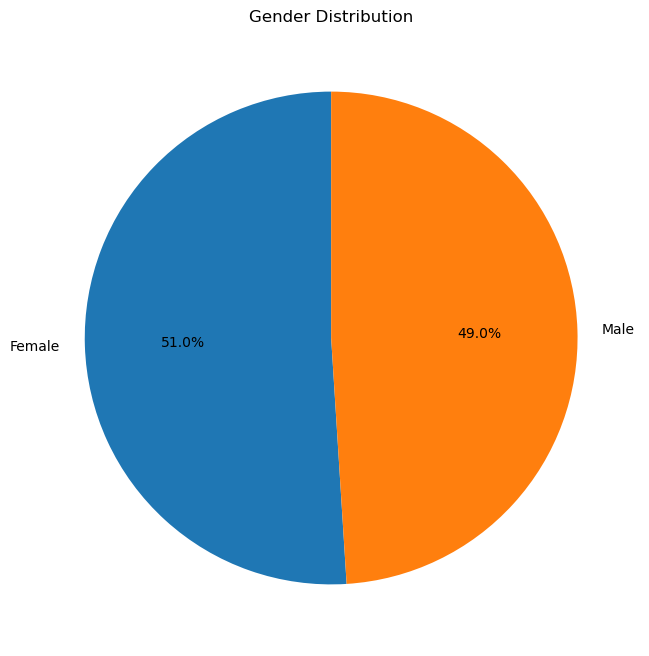

In [30]:
gender_distribution_percentage = (gender_distribution / gender_distribution.sum()) * 100
print(gender_distribution_percentage)

gender_distribution_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Gender Distribution')
plt.ylabel('')
plt.show()

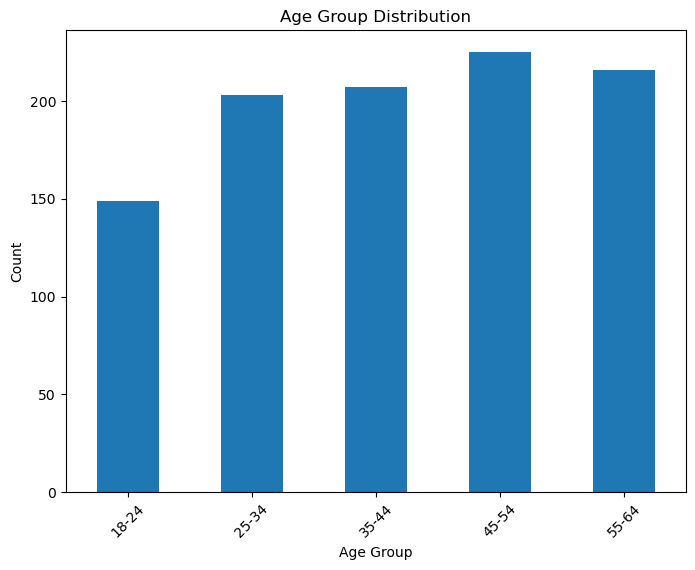

In [33]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = df['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

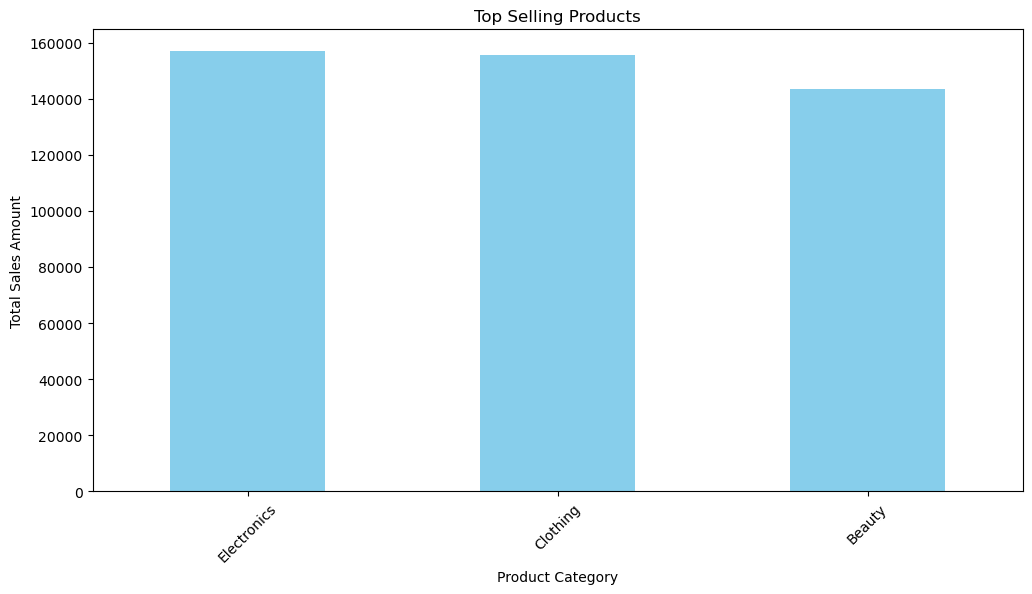

In [35]:
# Top Selling Products
top_selling_products = df.groupby('Product Category')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

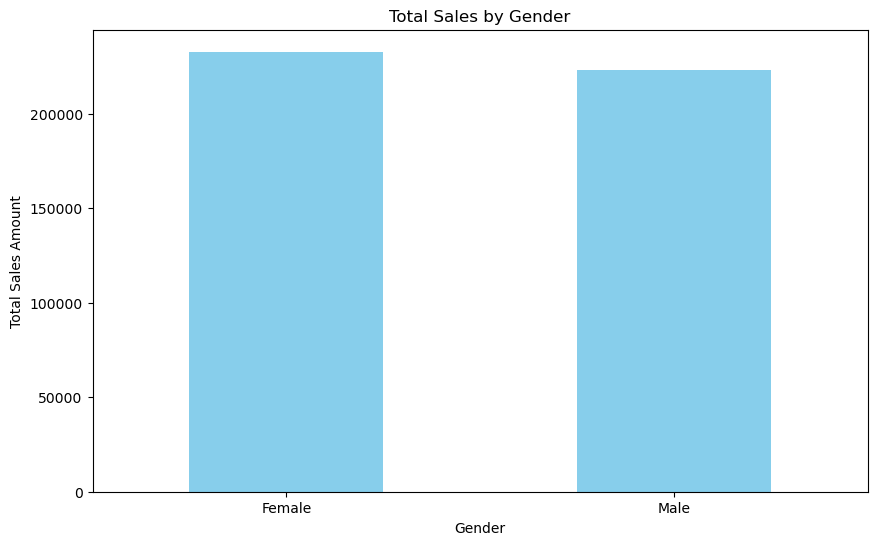

In [37]:
# Customer Gender Analysis
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()